In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
peliculas_ratings = pd.read_csv('../PI_1/Datos/Peliculas_Ratings.csv')
usuarios_ratings = pd.read_csv('../PI_1/Datos/Usuarios_Ratings.csv')

# Comenzamos analizando usuarios y ratings

In [4]:
print(usuarios_ratings.info())
print('--------------------------------------------')
print(usuarios_ratings['score'].describe())
print('--------------------------------------------')
usuarios_ratings.head(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   score      float64
 2   timestamp  object 
 3   movieId    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 336.4+ MB
None
--------------------------------------------
count    1.102429e+07
mean     3.533455e+00
std      1.059692e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: score, dtype: float64
--------------------------------------------


,userId,score,timestamp,movieId
0,1,1.0,2015-03-09,as680


Detectamos si hay outliers

In [5]:
print('Puntuacion maxima de usuarios:', usuarios_ratings['score'].max())
print('Puntuacion minima de usuarios:', usuarios_ratings['score'].min())
print('\nNo hay.')

Puntuacion maxima de usuarios: 5.0
Puntuacion minima de usuarios: 0.5

No hay.


Extraemos una tabla con los titulos de las peliculas y la plataforma

In [7]:
#El id por si acaso
del(movie_id)
#movie_id = pd.DataFrame(usuarios_ratings['movieId'].unique())
#Extraemos el titulo, id y plataforma de las peliculas
movie_title = peliculas_ratings[['id','title','plataforma']]
#Renombramos para poder unificar datos
movie_title.rename(columns = {'id':'movieId'}, inplace = True)
#Renombramos el id de pelicula para una mejor presentación
movie_title.replace({'a':'Amazon Prime','d':'Disney Plus','h':'Hulu','n':'Netflix'}, inplace = True)

C:\Users\axel_\AppData\Local\Temp\ipykernel_4332\1905002339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_title.rename(columns = {'id':'movieId'}, inplace = True)
C:\Users\axel_\AppData\Local\Temp\ipykernel_4332\1905002339.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_title.replace({'a':'Amazon Prime','d':'Disney Plus','h':'Hulu','n':'Netflix'}, inplace = True)


Agrupamos por pelicula, la cantidad de calificaciones.

Plataformas por color:
  ['Amazon Prime', 'Amazon Prime', 'Amazon Prime', 'Netflix', 'Amazon Prime', 'Hulu']


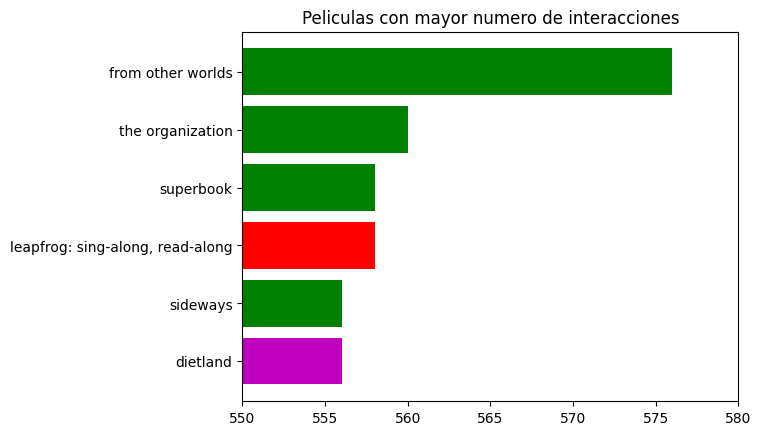

In [10]:

#Agrupamos por id de pelicula, haciendo un conteo de las calificaciones
calificaciones_x_peliculas = usuarios_ratings[['movieId','userId']].groupby(['movieId']).count()
#Reseteamos indice
calificaciones_x_peliculas.reset_index(inplace=True)
#Renombramos columna para cantidad de calificaciones
calificaciones_x_peliculas.rename(columns = {'userId':'cant_calificaciones'}, inplace = True)
#Hacemos un merge para tener los titulos de las peliculas
calificaciones_x_peliculas = pd.merge(calificaciones_x_peliculas,movie_title)
#Agregamos una columna de colores, y rellenamos segun la plataforma para decorar los gráficos
calificaciones_x_peliculas['color'] = calificaciones_x_peliculas['plataforma']
calificaciones_x_peliculas['color'].replace({'Amazon Prime':'g','Disney Plus':'c','Hulu':'m','Netflix':'r'}, inplace = True)

#Buscamos las peliculas con mayor cantidad de calificaciones, y los ordenamos graficar
max_calificaciones_x_peliculas = calificaciones_x_peliculas[['movieId','cant_calificaciones','color']].sort_values(['cant_calificaciones'],ascending = False).head(6)
#Agregamos los titulos y la paltaforma
max_calificaciones_x_peliculas = pd.merge(max_calificaciones_x_peliculas,movie_title)
max_calificaciones_x_peliculas.sort_values(['cant_calificaciones'],ascending=True, inplace=True)
#Buscamos las peliculas con menoor cantidad de calificaciones.
min_calificaciones_x_peliculas = calificaciones_x_peliculas[['movieId','cant_calificaciones','color']].sort_values(['cant_calificaciones'],ascending = True).head(6)
#Agregamos los titulos y la paltaforma
min_calificaciones_x_peliculas = pd.merge(min_calificaciones_x_peliculas,movie_title)

#Graficamos
title = list(max_calificaciones_x_peliculas['title'])
cant = list(max_calificaciones_x_peliculas['cant_calificaciones'])
plataforma = list(max_calificaciones_x_peliculas['plataforma'])
color = list(max_calificaciones_x_peliculas['color'])

print('Plataformas por color:\n ',list(reversed(plataforma)))

fig, ax = plt.subplots()
plt.title('Peliculas con mayor numero de interacciones')
plt.barh(title,cant, color = color)
plt.xlim(550,580)

plt.show()

Plataformas por color:
  ['Amazon Prime', 'Hulu', 'Netflix', 'Amazon Prime', 'Hulu', 'Amazon Prime', 'Hulu']


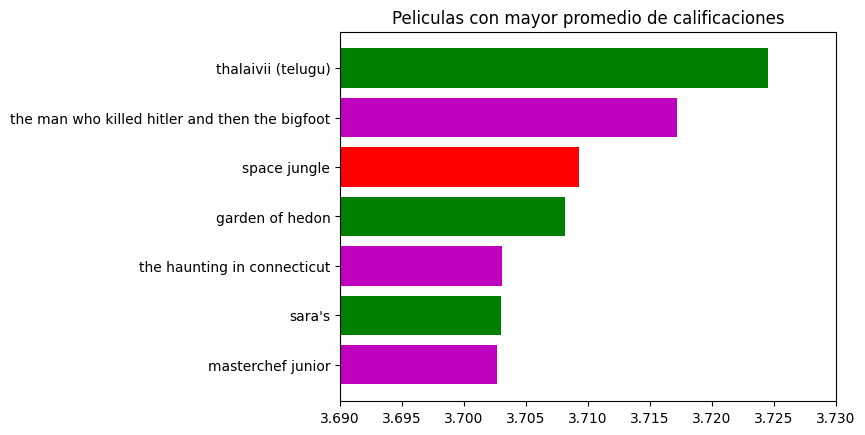

--------------------------------------------

Plataformas por color:
  ['Hulu', 'Netflix', 'Amazon Prime', 'Amazon Prime', 'Netflix', 'Amazon Prime', 'Hulu']


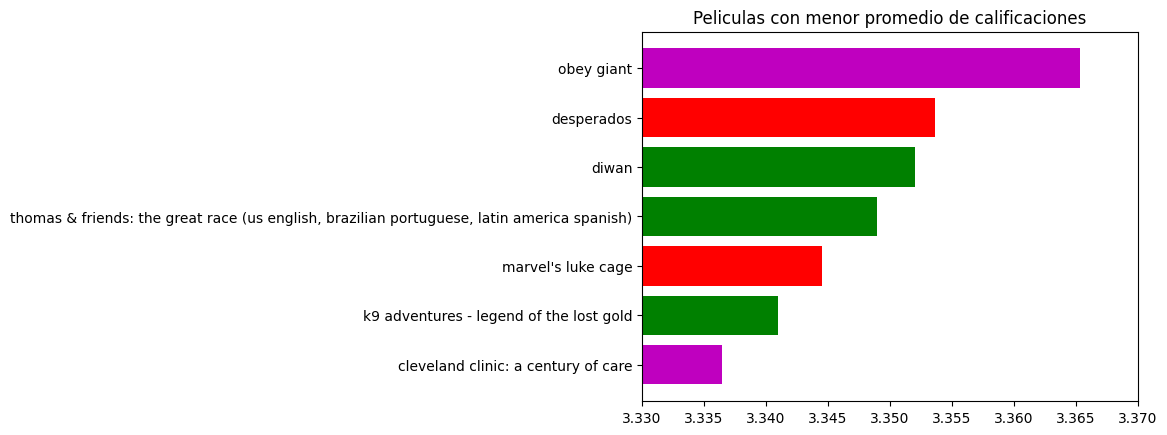

In [11]:
#Agrupamos por peliculas, el promedio de las califiaciones
score_x_peliculas = usuarios_ratings[['movieId','score']].groupby(['movieId']).mean()
#Reseteamos el indice
score_x_peliculas.reset_index(inplace=True)
#Agregamos los titulos de las peliculas
score_x_peliculas= pd.merge(score_x_peliculas,movie_title)
#Agregamos una columna de colores, y rellenamos segun la plataforma para decorar los gráficos
score_x_peliculas['color'] = score_x_peliculas['plataforma']
score_x_peliculas['color'].replace({'Amazon Prime':'g','Disney Plus':'c','Hulu':'m','Netflix':'r'}, inplace = True)

#Buscamos las peliculas con mayor y menor menor promedio de calificaciones, y los ordenamos para graficar
max_score_x_peliculas = score_x_peliculas[['title','score','color','plataforma']].sort_values(['score'],ascending = False).head(7)
max_score_x_peliculas.sort_values(by='score' ,ascending=True, inplace= True)
min_score_x_peliculas = score_x_peliculas[['title','score','color','plataforma']].sort_values(['score'],ascending = True).head(7)

#Grafico 1
title = list(max_score_x_peliculas['title'])
score = list(max_score_x_peliculas['score'])
plataforma = list(max_score_x_peliculas['plataforma'])
color = list(max_score_x_peliculas['color'])

print('Plataformas por color:\n ',list(reversed(plataforma)))

fig, ax = plt.subplots()
plt.title('Peliculas con mayor promedio de calificaciones')
plt.barh(title,score, color = color)
plt.xlim(3.69,3.73)

plt.show()
print('--------------------------------------------\n')

#Grafico 2
title = list(min_score_x_peliculas['title'])
score = list(min_score_x_peliculas['score'])
plataforma = list(min_score_x_peliculas['plataforma'])
color = list(min_score_x_peliculas['color'])

print('Plataformas por color:\n ',list(reversed(plataforma)))

fig, ax = plt.subplots()
plt.title('Peliculas con menor promedio de calificaciones')
plt.barh(title,score, color = color)
plt.xlim(3.33,3.37)

plt.show()

Calificaciones por plataforma y promedio de calificaciones por plataforma

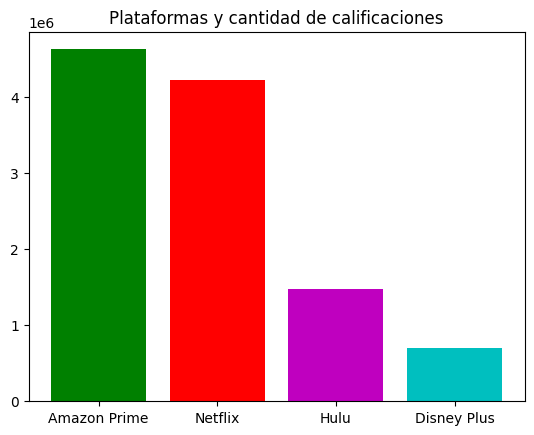

--------------------------------------------


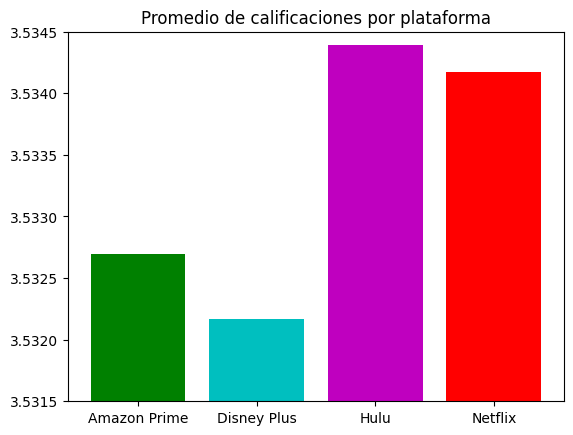

In [12]:
#Extraemos el id, y el score de cada calificacion
calificaciones_x_plataforma = usuarios_ratings[['movieId','score']]
#Agregamos el titulo a las calificaciones
calificaciones_x_plataforma = pd.merge(calificaciones_x_plataforma,movie_title)
#Agregamos una columna de colores, y rellenamos segun la plataforma para decorar los gráficos
calificaciones_x_plataforma['color'] = score_x_peliculas['plataforma']
calificaciones_x_plataforma['color'].replace({'Amazon Prime':'g','Disney Plus':'c','Hulu':'m','Netflix':'r'}, inplace = True)
#Contamos las calificaciones por plataforma
cant_calificaciones_x_plataforma = calificaciones_x_plataforma[['plataforma','score']].groupby(['plataforma']).count()
#Agregamos color
cant_calificaciones_x_plataforma['color'] = ['g','c','m','r']
#Reseteamos el indice
cant_calificaciones_x_plataforma.reset_index(inplace = True)
#Renombramos la columna de cantidad de calificaciones
cant_calificaciones_x_plataforma.rename(columns = {'score':'cant_calificaciones'}, inplace = True)
#Ordenamos los datos para graficar
cant_calificaciones_x_plataforma.sort_values(['cant_calificaciones'], ascending = False, inplace = True)
#Calculamos el promedio de calificaciones para cada plataforma
mean_calificaciones_x_plataforma = calificaciones_x_plataforma[['plataforma','score']].groupby(['plataforma']).mean()
#Agregamos color para graficar
mean_calificaciones_x_plataforma['color'] = ['g','c','m','r']
#Reseteamos el indice
mean_calificaciones_x_plataforma.reset_index(inplace = True)
#Renombramos la columna con el promedio de calificaciones
mean_calificaciones_x_plataforma.rename(columns = {'score':'mean_calificaciones'}, inplace = True)

#Grafico1
cant_calificaciones = list(cant_calificaciones_x_plataforma['cant_calificaciones'])
plataforma = list(cant_calificaciones_x_plataforma['plataforma'])
color = list(cant_calificaciones_x_plataforma['color'])

fig, ax = plt.subplots()
plt.title('Plataformas y cantidad de calificaciones')
plt.bar(plataforma,cant_calificaciones, color = color)

plt.show()
print('--------------------------------------------')

#Grafico2
mean_calificaciones = list(mean_calificaciones_x_plataforma['mean_calificaciones'])
plataforma = list(mean_calificaciones_x_plataforma['plataforma'])
color = list(mean_calificaciones_x_plataforma['color'])

fig, ax = plt.subplots()
plt.title('Promedio de calificaciones por plataforma')
plt.bar(plataforma,mean_calificaciones, color = color)
plt.ylim(3.5315,3.5345)

plt.show()

# Ahora analizaremos las peliculas y el ratings

In [15]:
#Cantidad, y tipos de datos que tenemos
print(peliculas_ratings['score'].describe())
peliculas_ratings.head(1)

count    22998.000000
mean         3.533444
std          0.048563
min          3.336000
25%          3.500000
50%          3.534000
75%          3.567000
max          3.725000
Name: score, dtype: float64


,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,duration_int,duration_type,plataforma,score
0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,a,3.467


Detectamos si hay outliers en la columna duration_int

In [13]:
print('La duracion de la pelicula con maxima duarion es de:',peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'min'].max(), 'minutos. Posibles Outliers')
print('La duracion de la pelicula con minima duarion es de:',peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'min'].min(), '. Ouliers, que deben ser por valores nulos')
print('La serie con mas temporadas tiene:',peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'seasons'].max(), 'temporadas')
print('La serie con menos temporadas tiene:',peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'seasons'].min(), 'temporadas')
print('Corroboramos que en la columna season figure una sola temporada: max =', peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'season'].max(), 'min =',peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'season'].min(), '. Es correcto')

La duracion de la pelicula con maxima duarion es de: 601 minutos. Posibles Outliers
La duracion de la pelicula con minima duarion es de: 0 . Ouliers, que deben ser por valores nulos
La serie con mas temporadas tiene: 34 temporadas
La serie con menos temporadas tiene: 2 temporadas
Corroboramos que en la columna season figure una sola temporada: max = 1 min = 1 . Es correcto


Boxplot sobre duracion de peliculas "min"



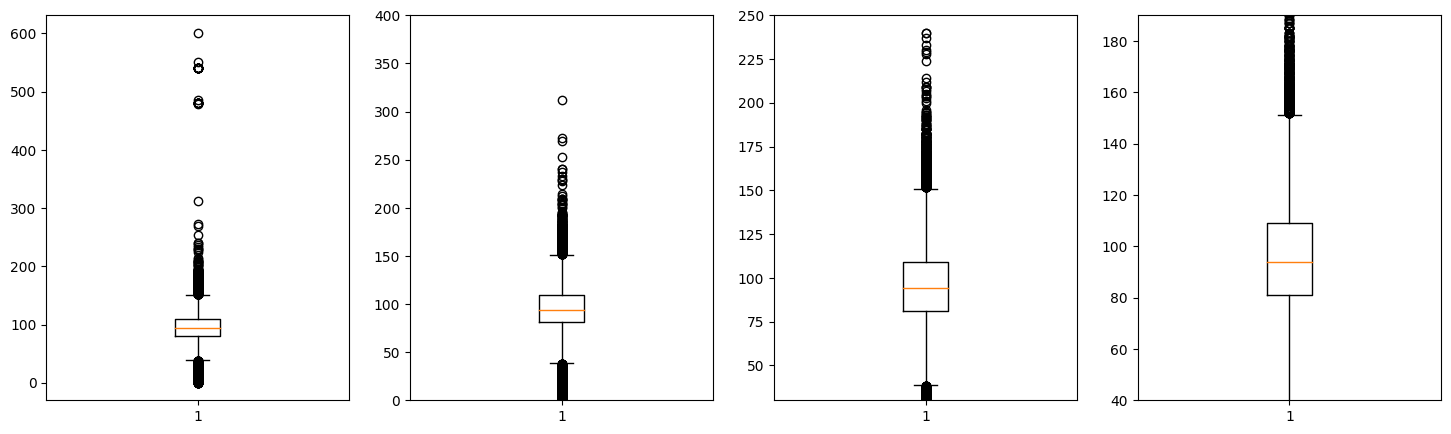

--------------------------------------------

Violinplot sobre duracion de peliculas "min"



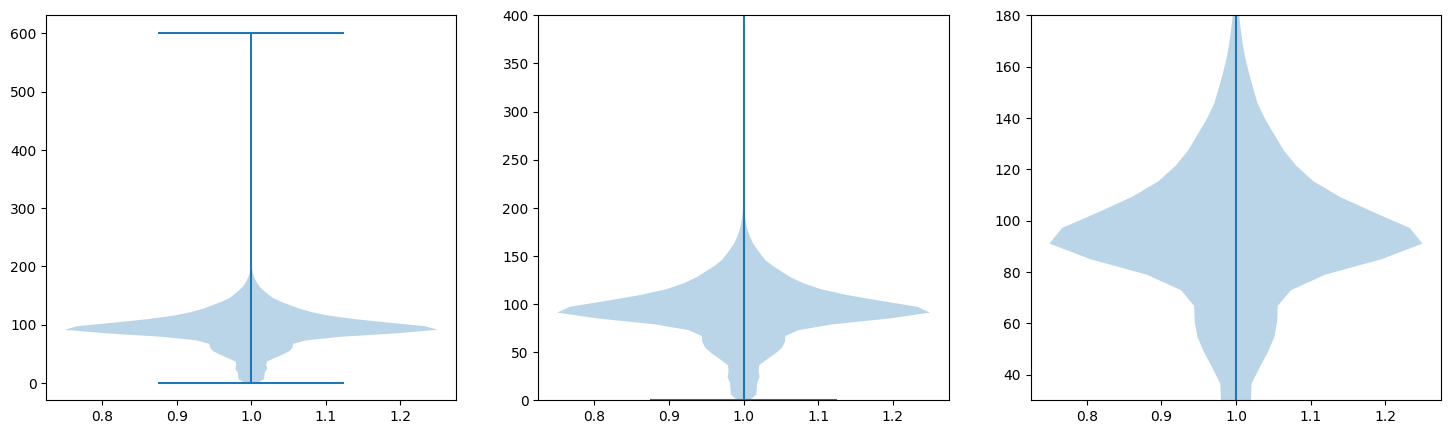

--------------------------------------------

Boxplot y voilinplot sobre duracion de peliculas "seasons"



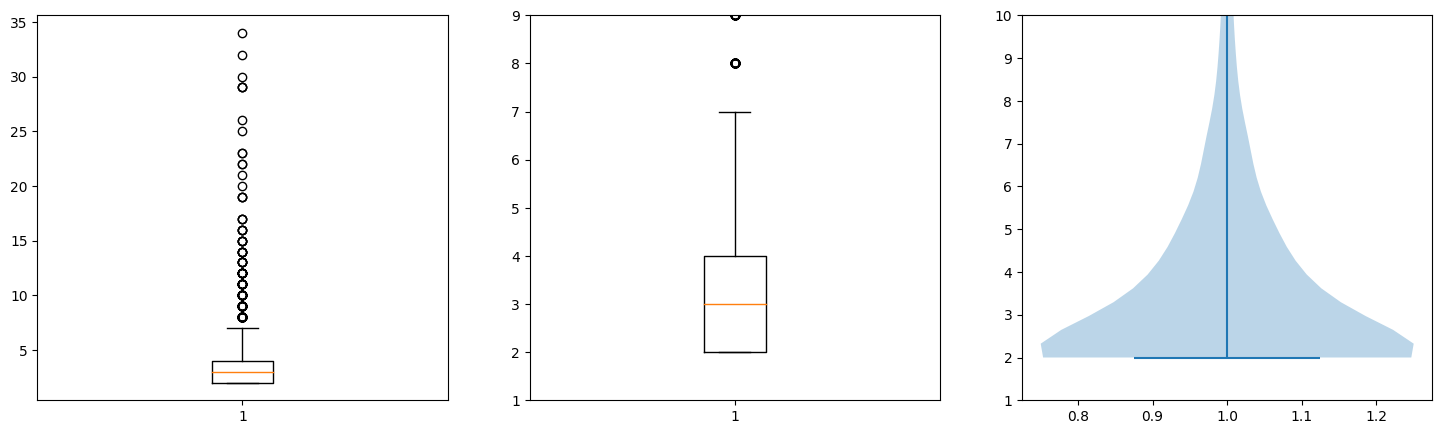

In [14]:
print('Boxplot sobre duracion de peliculas "min"\n')
duracion_peliculas = list(peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'min'])

#Grafico1
fig, ax = plt.subplots(1,4)
fig.set_size_inches(18,5)

ax[0].boxplot(duracion_peliculas)
ax[1].boxplot(duracion_peliculas)
ax[1].set_ylim(0,400)
ax[2].boxplot(duracion_peliculas)
ax[2].set_ylim(30,250)
ax[3].boxplot(duracion_peliculas)
ax[3].set_ylim(40,190)
plt.show()

print('--------------------------------------------\n')

print('Violinplot sobre duracion de peliculas "min"\n')
duracion_peliculas = list(peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'min'])

#Grafico2
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax[0].violinplot(duracion_peliculas)
ax[1].violinplot(duracion_peliculas)
ax[1].set_ylim(0,400)
ax[2].violinplot(duracion_peliculas)
ax[2].set_ylim(30,180)
plt.show()

print('--------------------------------------------\n')

print('Boxplot y voilinplot sobre duracion de peliculas "seasons"\n')
duracion_temporadas = list(peliculas_ratings['duration_int'][peliculas_ratings['duration_type'] == 'seasons'])

#Grafico3
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax[0].boxplot(duracion_temporadas)
ax[1].boxplot(duracion_temporadas)
ax[1].set_ylim(1,9)
ax[2].violinplot(duracion_temporadas)
ax[2].set_ylim(1,10)
plt.show()


Calificaciones por plataforma y tipo de contenido

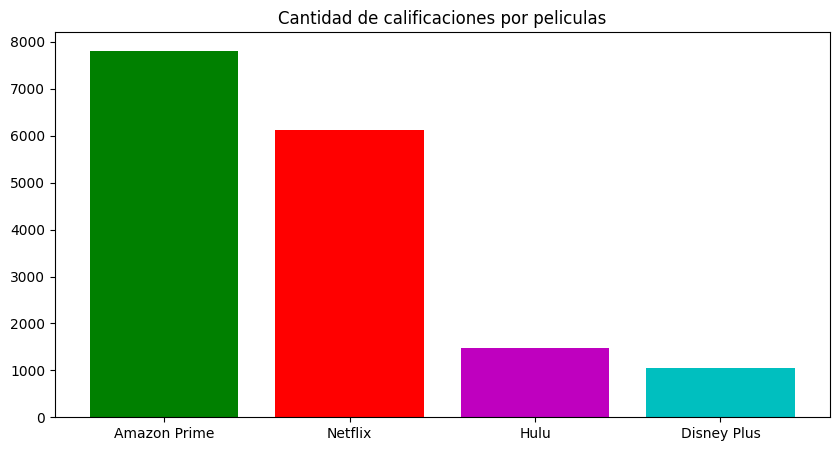

--------------------------------------------



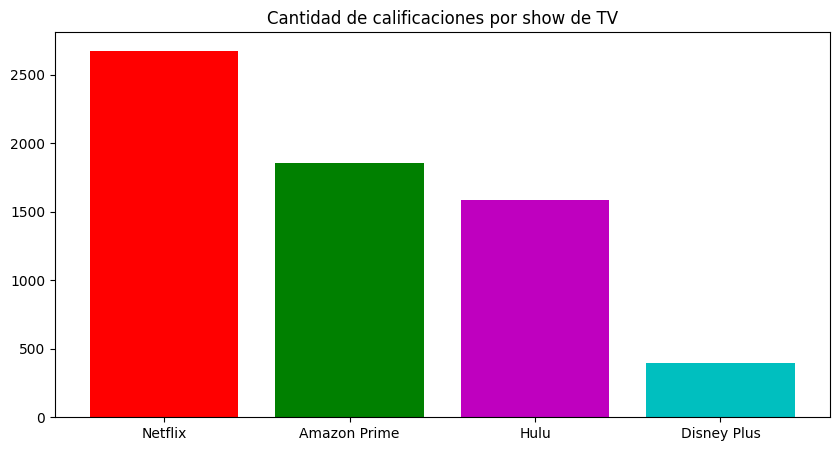

In [18]:
#Contamos las calificaciones por plataforma y tipo de contenido
rating_x_tipo_contenido = peliculas_ratings[['plataforma','type','score']].groupby(['type','plataforma']).count()
#Reseteamos el indice
rating_x_tipo_contenido.reset_index(inplace=True)
#Reemplazamos la inicial, por el nombre de la plataforma
rating_x_tipo_contenido.replace({'a':'Amazon Prime','d':'Disney Plus','h':'Hulu','n':'Netflix'}, inplace = True)
#Agregamos color a las plataformas para decorar
rating_x_tipo_contenido['color'] = rating_x_tipo_contenido['plataforma']
rating_x_tipo_contenido['color'].replace({'Amazon Prime':'g','Disney Plus':'c','Hulu':'m','Netflix':'r'}, inplace = True)
#Renombramos la columna de cantidad de calificaciones
rating_x_tipo_contenido.rename(columns = {'score':'cant_calificaciones'},inplace=True)

#Separamos los tipos de contenidos movie/tvshow
rating_x_tipo_contenido_movie = rating_x_tipo_contenido[rating_x_tipo_contenido['type'] == 'movie'].sort_values(['cant_calificaciones'], ascending = False)

rating_x_tipo_contenido_tvshow = rating_x_tipo_contenido[rating_x_tipo_contenido['type'] == 'tv show'].sort_values(['cant_calificaciones'], ascending = False)

#Variables para graficar
plataforma1 = list(rating_x_tipo_contenido_movie['plataforma'])
cantidad1 = list(rating_x_tipo_contenido_movie['cant_calificaciones'])
color1 = list(rating_x_tipo_contenido_movie['color'])
plataforma2 = list(rating_x_tipo_contenido_tvshow['plataforma'])
cantidad2 = list(rating_x_tipo_contenido_tvshow['cant_calificaciones'])
color2 = list(rating_x_tipo_contenido_tvshow['color'])

#Graficamos
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.bar(plataforma1,cantidad1,color = color1)
plt.title('Cantidad de calificaciones por peliculas')
plt.show()
print('--------------------------------------------\n')
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.bar(plataforma2,cantidad2,color = color2)
plt.title('Cantidad de calificaciones por show de TV')
plt.show()

Calificaciones por plataforma y genero

C:\Users\axel_\AppData\Local\Temp\ipykernel_4332\3853974226.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_x_genero_contenido_amazon.sort_values(['cant_calificaciones'], inplace = True)
C:\Users\axel_\AppData\Local\Temp\ipykernel_4332\3853974226.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_x_genero_contenido_disney.sort_values(['cant_calificaciones'], inplace = True)
C:\Users\axel_\AppData\Local\Temp\ipykernel_4332\3853974226.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

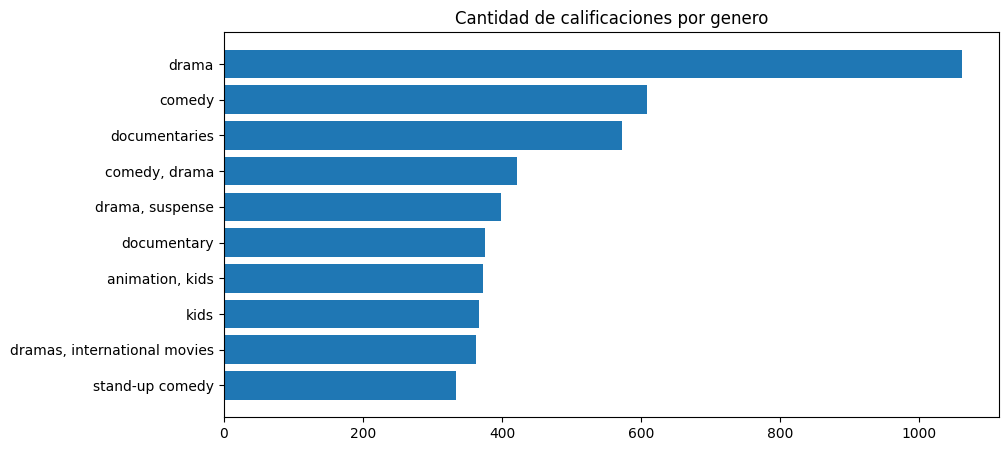

--------------------------------------------



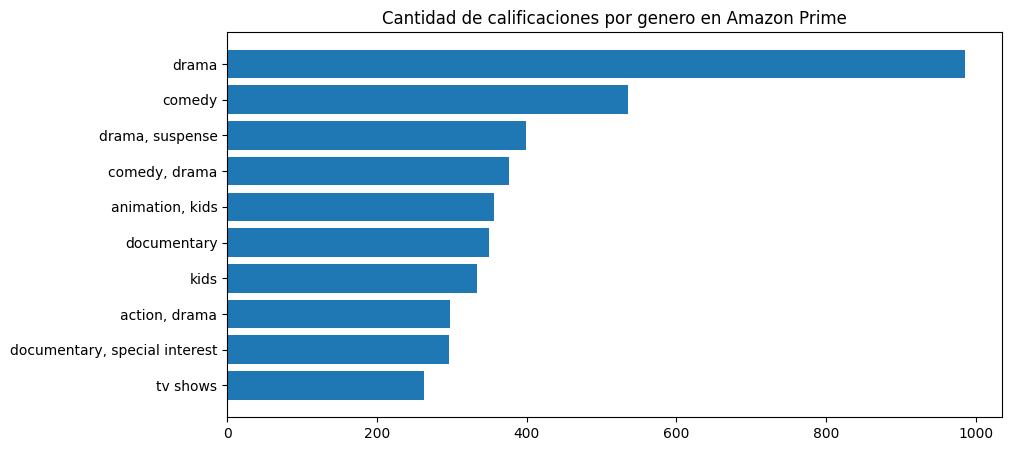

--------------------------------------------



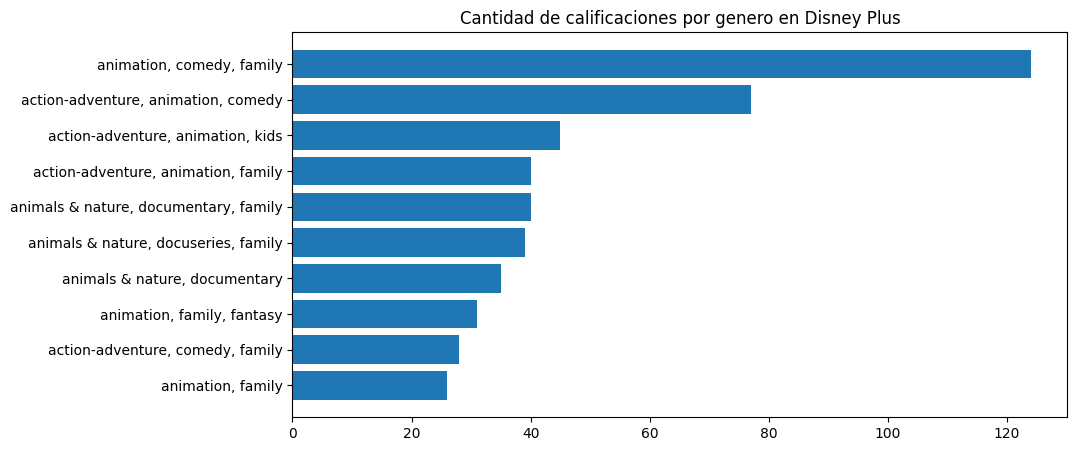

--------------------------------------------



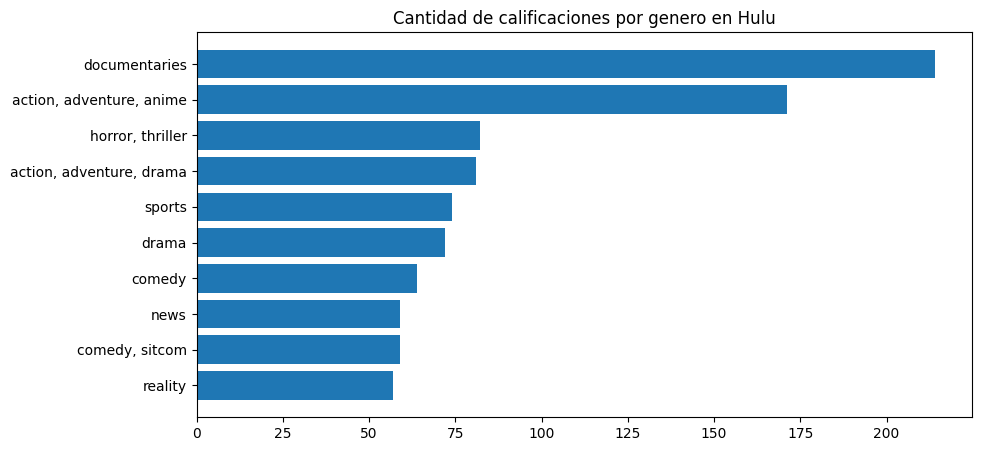

--------------------------------------------



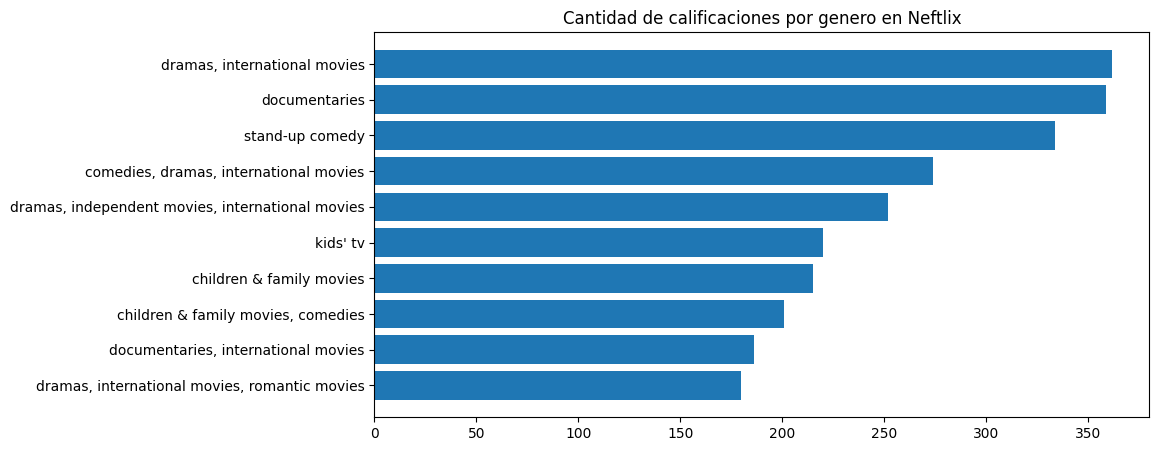

In [19]:
#Contamos las calificaciones por plataforma y genero
rating_x_genero_contenido = peliculas_ratings[['plataforma','listed_in','score']].groupby(['listed_in','plataforma']).count()
#Reseteamos el indice
rating_x_genero_contenido.reset_index(inplace=True)
#Renombramos las plataformas
rating_x_genero_contenido.replace({'a':'Amazon Prime','d':'Disney Plus','h':'Hulu','n':'Netflix'}, inplace = True)
#le damos color a las plataformas
rating_x_genero_contenido['color'] = rating_x_genero_contenido['plataforma']
rating_x_genero_contenido['color'].replace({'Amazon Prime':'g','Disney Plus':'c','Hulu':'m','Netflix':'r'}, inplace = True)
#Renombramos la columna de cantidad de calificaciones
rating_x_genero_contenido.rename(columns = {'score':'cant_calificaciones'},inplace=True)
#Contamos las calificaciones por genero sobre todas las plataformas
rating_x_genero_contenido_total = peliculas_ratings[['listed_in','score',]].groupby(['listed_in']).count()
#Reseteamos indices
rating_x_genero_contenido_total.reset_index(inplace=True)
#Renombramos la columna con la cantidad de calificaciones
rating_x_genero_contenido_total.rename(columns = {'score':'cant_calificaciones'}, inplace=True)
#Ordenamos para graficar
rating_x_genero_contenido_total.sort_values(['cant_calificaciones'], ascending=True,inplace = True)
#Nos quedamos con los 10 valores mas altos
rating_x_genero_contenido_total = rating_x_genero_contenido_total.tail(10)

#Separamos por plataforma / Amazon Prime
rating_x_genero_contenido_amazon = rating_x_genero_contenido[rating_x_genero_contenido['plataforma'] == 'Amazon Prime']
#Ordenamos
rating_x_genero_contenido_amazon.sort_values(['cant_calificaciones'], inplace = True)
#Nos quedamos con los 10 valores mas altos
rating_x_genero_contenido_amazon = rating_x_genero_contenido_amazon.tail(10)

#Separamos por plataforma / Disney Plus
rating_x_genero_contenido_disney = rating_x_genero_contenido[rating_x_genero_contenido['plataforma'] == 'Disney Plus']
#Ordenamos para graficar
rating_x_genero_contenido_disney.sort_values(['cant_calificaciones'], inplace = True)
#Nos quedamos con los 10 valores mas altos
rating_x_genero_contenido_disney = rating_x_genero_contenido_disney.tail(10)

#Separamos por plataforma / Hulu
rating_x_genero_contenido_hulu = rating_x_genero_contenido[rating_x_genero_contenido['plataforma'] == 'Hulu']
#Ordenamos para graficar
rating_x_genero_contenido_hulu.sort_values(['cant_calificaciones'], inplace = True)
#Nos quedamos con los 10 valores mas altos
rating_x_genero_contenido_hulu = rating_x_genero_contenido_hulu.tail(10)

#Separamos por plataforma / Netflix
rating_x_genero_contenido_netflix = rating_x_genero_contenido[rating_x_genero_contenido['plataforma'] == 'Netflix']
#Ordenamos para graficar
rating_x_genero_contenido_netflix.sort_values(['cant_calificaciones'], inplace = True)
#Nos quedamos con los 10 valores mas altos
rating_x_genero_contenido_netflix = rating_x_genero_contenido_netflix.tail(10)

#Grafico genero / total
listed_in1 = list(rating_x_genero_contenido_total['listed_in'])
cantidad1 = list(rating_x_genero_contenido_total['cant_calificaciones'])
#Grafico genero / Amazon Prime
listed_in2 = list(rating_x_genero_contenido_amazon['listed_in'])
cantidad2 = list(rating_x_genero_contenido_amazon['cant_calificaciones'])
#Grafico genero / Disney Plus
listed_in3 = list(rating_x_genero_contenido_disney['listed_in'])
cantidad3 = list(rating_x_genero_contenido_disney['cant_calificaciones'])
#Grafico genero / Hulu
listed_in4 = list(rating_x_genero_contenido_hulu['listed_in'])
cantidad4 = list(rating_x_genero_contenido_hulu['cant_calificaciones'])
#Grafico genero / Netflix
listed_in5 = list(rating_x_genero_contenido_netflix['listed_in'])
cantidad5 = list(rating_x_genero_contenido_netflix['cant_calificaciones'])

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.barh(listed_in1,cantidad1)
plt.title('Cantidad de calificaciones por genero')
plt.show()
print('--------------------------------------------\n')
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.barh(listed_in2,cantidad2)
plt.title('Cantidad de calificaciones por genero en Amazon Prime')
plt.show()
print('--------------------------------------------\n')
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.barh(listed_in3,cantidad3)
plt.title('Cantidad de calificaciones por genero en Disney Plus')
plt.show()
print('--------------------------------------------\n')
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.barh(listed_in4,cantidad4)
plt.title('Cantidad de calificaciones por genero en Hulu')
plt.show()
print('--------------------------------------------\n')
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.barh(listed_in5,cantidad5)
plt.title('Cantidad de calificaciones por genero en Neftlix')
plt.show()